Метрики для каждой целевой переменной:

Next_Tmax:
MAE: 0.772
RMSE: 1.039
R²: 0.885

Next_Tmin:
MAE: 0.614
RMSE: 0.796
R²: 0.897

Время выполнения: 41.03 секунд


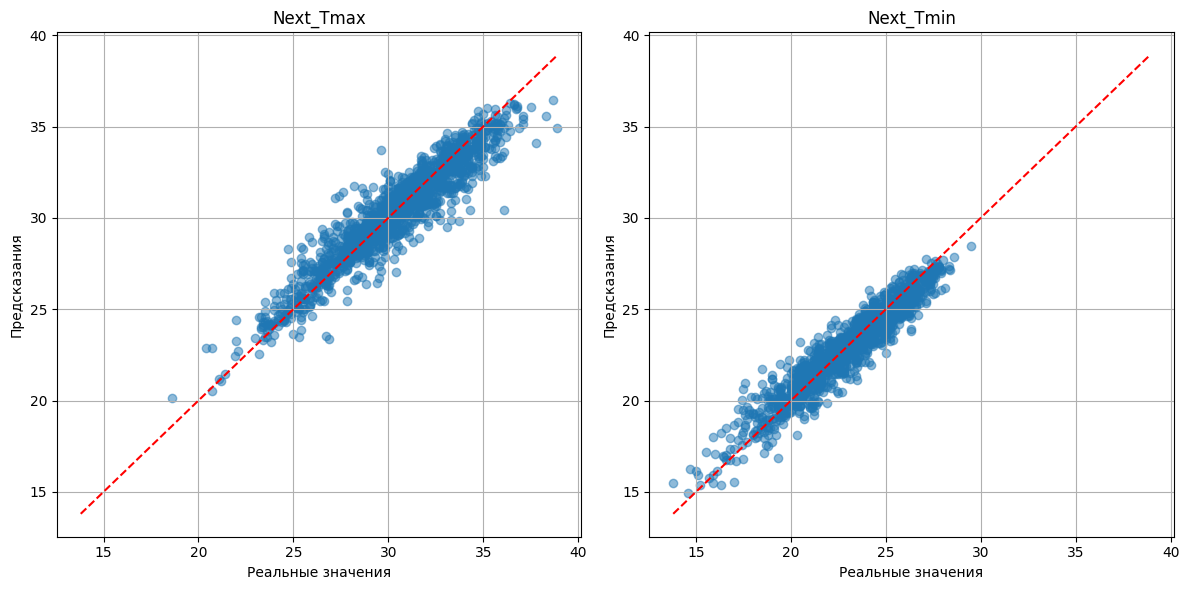

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'Bias_correction_ucl.csv'  # Укажите путь к файлу
df = pd.read_csv(file_path, encoding='utf-8')

# Удаление строк с пропущенными значениями
df_cleaned = df.dropna()

# Выбор признаков и целевых переменных
# Удаление ненужных столбцов (дата, станция и другие нерелевантные признаки)
excluded_cols = ['Date', 'station', 'Next_Tmax', 'Next_Tmin']
X = df_cleaned.drop(columns=excluded_cols)
y = df_cleaned[['Next_Tmax', 'Next_Tmin']]  # Две целевые переменные

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Random Forest
start_time = time.time()
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
end_time = time.time()

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик для каждой целевой переменной
metrics = {}
for i, target in enumerate(['Next_Tmax', 'Next_Tmin']):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    
    metrics[target] = {
        'MAE': round(mae, 3),
        'RMSE': round(rmse, 3),
        'R²': round(r2, 3)
    }

# Вывод метрик
print("Метрики для каждой целевой переменной:")
for target, values in metrics.items():
    print(f"\n{target}:")
    print(f"MAE: {values['MAE']}")
    print(f"RMSE: {values['RMSE']}")
    print(f"R²: {values['R²']}")

# Время работы
print(f"\nВремя выполнения: {round(end_time - start_time, 2)} секунд")

# Визуализация реальных vs предсказанных значений
plt.figure(figsize=(12, 6))
targets = ['Next_Tmax', 'Next_Tmin']

for i, target in enumerate(targets):
    plt.subplot(1, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
    plt.plot([y_test.min().min(), y_test.max().max()], 
             [y_test.min().min(), y_test.max().max()], 'r--')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказания')
    plt.title(f'{target}')
    plt.grid(True)

plt.tight_layout()
plt.show()